In [2]:
%load_ext autoreload
%load_ext sql
%autoreload 2

import sqlite3

import matplotlib.pyplot as plt
import pandas as pd
from config import settings
from data import SQLRepository

from data import AlphaVantageAPI



Model directory: C:/Users/Admin/OneDrive - United States International University (USIU)/Documents/KULU_Doc/Projects/Volatility-Forecasting-in-Kenya/models


In [23]:
connection = sqlite3.connect(database=settings.db_name,check_same_thread=False)

print("connection type:", type(connection))

# Create instance of `AlphaVantageAPI` class
av = AlphaVantageAPI()
print("av type:", type(av))

connection type: <class 'sqlite3.Connection'>
av type: <class 'data.AlphaVantageAPI'>


In [24]:
# Create instance of class
repo = SQLRepository(connection=connection)

# Does `repo` have a "connection" attribute?

assert hasattr(repo,"connection")
# Is the "connection" attribute a SQLite `Connection`?
assert isinstance(repo.connection, sqlite3.Connection)

In [ ]:
ticker = "AMBUJACEM.BSE"

# Get Ambuja data using `av`
ambuja_records = av.get_daily(ticker=ticker)

# Insert `ambuja_records` database using `repo`
response = repo.insert_table(
    table_name=ticker,
    records=ambuja_records,
    if_exists="replace"
)

response

{'transaction_successful': True, 'records_inserted': 5112}

In [6]:
ticker = "AMBUJACEM.BSE"
df_ambuja = repo.read_table(table_name=ticker,limit=2500)

print("df_ambuja type:", type(df_ambuja))
print("df_ambuja shape:", df_ambuja.shape)
df_ambuja.head()

df_ambuja type: <class 'pandas.core.frame.DataFrame'>
df_ambuja shape: (2500, 5)


,open,high,low,close,volume
date,,,,,
2025-10-03,572.55,580.00,570.55,575.75,55725.0
2025-10-01,570.50,573.80,565.50,570.80,39659.0
2025-09-30,562.15,572.90,562.15,570.05,52447.0
2025-09-29,576.45,576.45,561.35,562.55,43846.0
2025-09-26,580.00,580.95,563.80,565.00,69839.0


In [9]:

ticker = "SUZLON.BSE"
df_sulzon = repo.read_table(table_name=ticker,limit=2500)

print("df_sulzon type:", type(df_sulzon))
print("df_sulzon shape:", df_sulzon.shape)
df_sulzon.head()

df_sulzon type: <class 'pandas.core.frame.DataFrame'>
df_sulzon shape: (2500, 5)


,open,high,low,close,volume
date,,,,,
2025-10-01,55.28,55.35,54.59,55.20,3721656.0
2025-09-30,55.40,55.45,54.39,55.04,7914565.0
2025-09-29,55.58,56.35,55.18,55.29,6333759.0
2025-09-26,56.79,57.23,55.18,55.31,9556964.0
2025-09-25,57.53,58.19,56.44,56.68,5065183.0


In [ ]:
ticker = "SUZLON.BSE"
response = repo.insert_table(table_name=ticker, records=df_sulzon , if_exists="replace")

# Does your method return a dictionary?
assert isinstance(response, dict)

# Are the keys of that dictionary correct? transaction_successful
assert sorted(list(response.keys())) == ['records_inserted','transaction_successful']

In [ ]:
# Assign `read_table` output to `df_suzlon`
df_ambuja = repo.read_table(table_name="SUZLON.BSE", limit=2500)  # noQA F821

# Is `df_suzlon` a DataFrame?

assert isinstance(df_ambuja,pd.DataFrame)

# Does it have a `DatetimeIndex`?
assert isinstance(df_ambuja.index, pd.DatetimeIndex)


# Is the index named "date"?
assert df_ambuja.index.name== "date"

# Does it have 2,500 rows and 5 columns?
assert df_ambuja.shape==(2500,5)

# Are the column names correct?
assert df_ambuja.columns.to_list()==['open', 'high', 'low', 'close', 'volume']

# Are the column data types correct?
assert all(df_ambuja.dtypes==float)

# Print `df_suzlon` info
print("df_suzlon shape:", df_ambuja.shape)
print()
print(df_ambuja.info())
df_ambuja.head()

df_suzlon shape: (2500, 5)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2500 entries, 2025-10-01 to 2015-08-10
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    2500 non-null   float64
 1   high    2500 non-null   float64
 2   low     2500 non-null   float64
 3   close   2500 non-null   float64
 4   volume  2500 non-null   float64
dtypes: float64(5)
memory usage: 117.2 KB
None


,open,high,low,close,volume
date,,,,,
2025-10-01,55.28,55.35,54.59,55.20,3721656.0
2025-09-30,55.40,55.45,54.39,55.04,7914565.0
2025-09-29,55.58,56.35,55.18,55.29,6333759.0
2025-09-26,56.79,57.23,55.18,55.31,9556964.0
2025-09-25,57.53,58.19,56.44,56.68,5065183.0


### **Comparing Stock close prices**

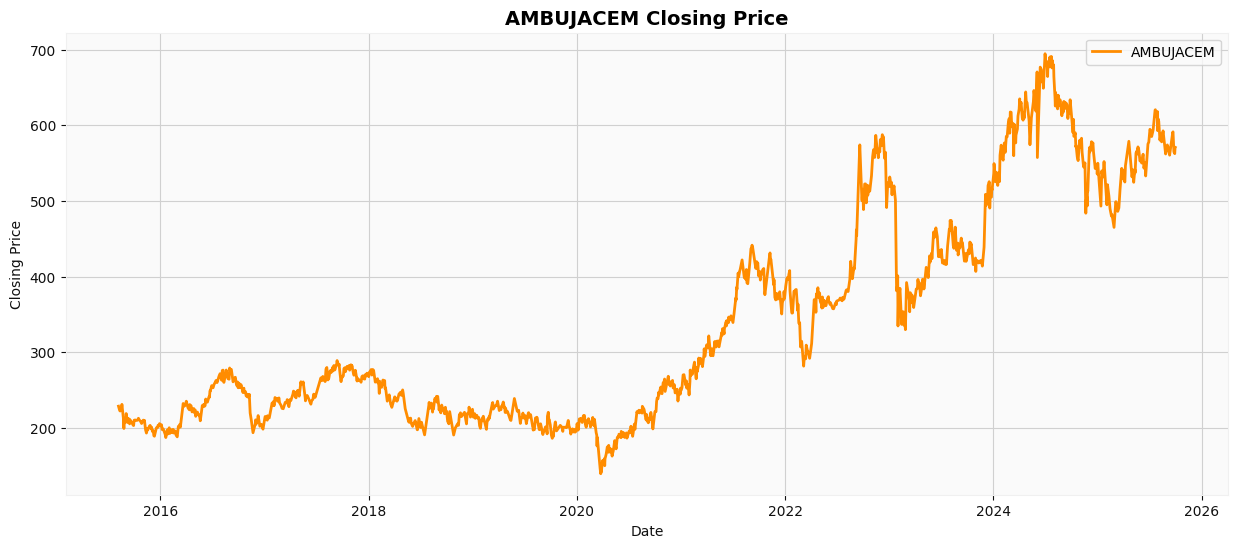

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15,6))


# Line plot on top
ax.plot(df_ambuja.index, df_ambuja["close"], color="darkorange", label="AMBUJACEM", linewidth=2)

# Labels and title
ax.set_title("AMBUJACEM Closing Price", fontsize=14, fontweight="bold")
ax.set_xlabel("Date")
ax.set_ylabel("Closing Price")

# Legend
ax.legend()

plt.show()


In [ ]:
df_ambuja.head()

,open,high,low,close,volume
date,,,,,
2025-10-01,55.28,55.35,54.59,55.20,3721656.0
2025-09-30,55.40,55.45,54.39,55.04,7914565.0
2025-09-29,55.58,56.35,55.18,55.29,6333759.0
2025-09-26,56.79,57.23,55.18,55.31,9556964.0
2025-09-25,57.53,58.19,56.44,56.68,5065183.0


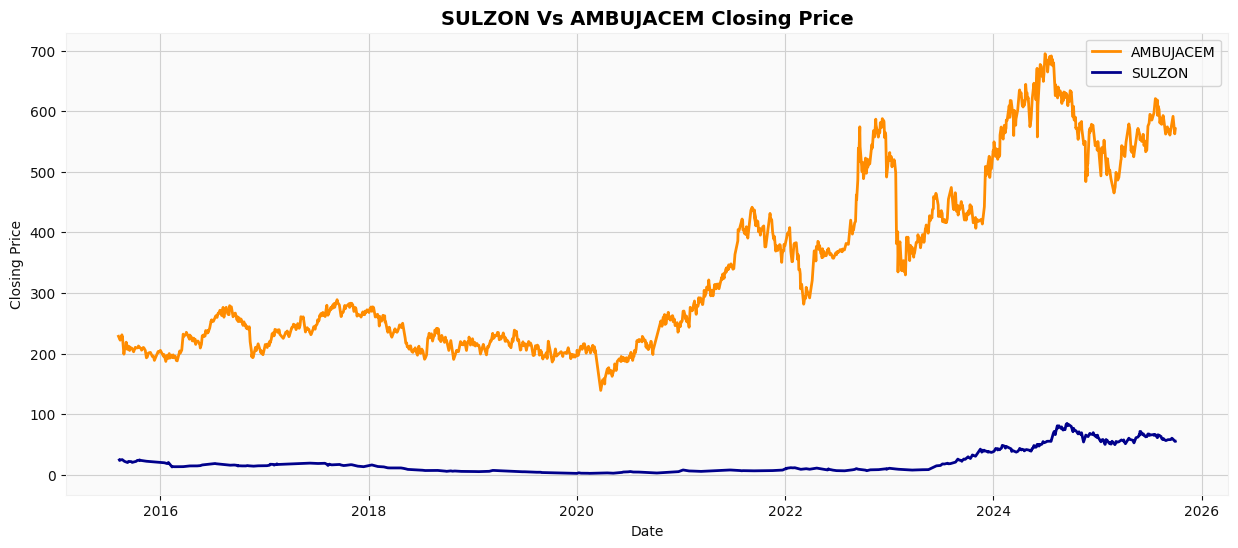

In [ ]:
fig, ax = plt.subplots(figsize=(15,6))


# Line plot on top
ax.plot(df_ambuja.index, df_ambuja["close"], color="darkorange", label="AMBUJACEM", linewidth=2)
ax.plot(df_suzlon.index,df_suzlon["close"], color="darkblue", label="SULZON", linewidth=2)

# Labels and title
ax.set_title("SULZON Vs AMBUJACEM Closing Price", fontsize=14, fontweight="bold")
ax.set_xlabel("Date")
ax.set_ylabel("Closing Price")

# Legend
ax.legend()

plt.show()


### **Comparing Stock Returns**

In [ ]:
# Sort DataFrame ascending by date
df_ambuja.sort_index(ascending=True,inplace=True)

# Create "return" column
df_ambuja["return"]=df_ambuja["close"].pct_change()*100

print("df_suzlon shape:", df_ambuja.shape)
print(df_ambuja.info())
df_ambuja.head()

df_suzlon shape: (2500, 6)
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2500 entries, 2015-08-07 to 2025-10-01
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    2500 non-null   float64
 1   high    2500 non-null   float64
 2   low     2500 non-null   float64
 3   close   2500 non-null   float64
 4   volume  2500 non-null   float64
 5   return  2499 non-null   float64
dtypes: float64(6)
memory usage: 136.7 KB
None


,open,high,low,close,volume,return
date,,,,,,
2015-08-07,230.10,231.40,228.00,228.50,55978.0,NaN
2015-08-10,229.05,230.60,224.70,226.45,45571.0,-0.897155
2015-08-11,226.00,226.20,221.30,222.95,54466.0,-1.545595
2015-08-12,223.00,224.70,219.30,222.90,68304.0,-0.022427
2015-08-13,223.00,225.65,221.45,222.05,106447.0,-0.381337


In [ ]:
# Sort DataFrame ascending by date
df_suzlon.sort_index(ascending=True,inplace=True)

# Create "return" column
df_suzlon["return"]=df_suzlon["close"].pct_change()*100

print("df_suzlon shape:", df_suzlon.shape)
print(df_suzlon.info())
df_suzlon.head()

df_suzlon shape: (2500, 6)
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2500 entries, 2015-08-10 to 2025-10-01
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    2500 non-null   float64
 1   high    2500 non-null   float64
 2   low     2500 non-null   float64
 3   close   2500 non-null   float64
 4   volume  2500 non-null   float64
 5   return  2499 non-null   float64
dtypes: float64(6)
memory usage: 136.7 KB
None


,open,high,low,close,volume,return
date,,,,,,
2015-08-10,25.25,25.70,24.45,24.55,13444893.0,NaN
2015-08-11,24.75,24.90,23.50,23.60,7848355.0,-3.869654
2015-08-12,23.40,24.75,23.05,23.90,12239961.0,1.271186
2015-08-13,24.25,24.80,24.05,24.25,6921497.0,1.464435
2015-08-14,24.55,24.90,24.45,24.55,5694424.0,1.237113


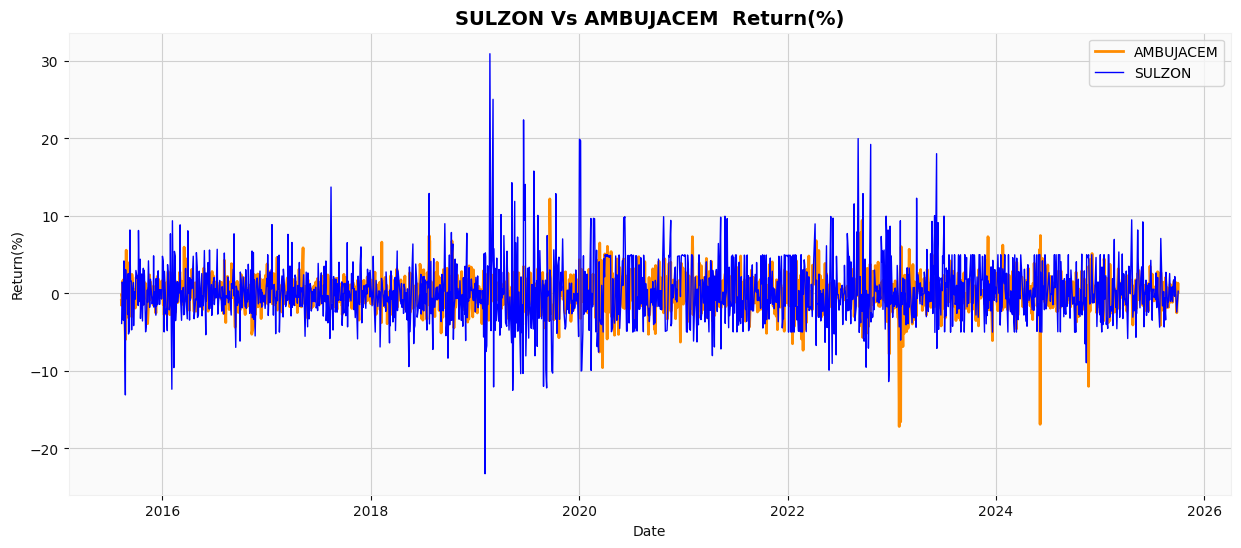

In [ ]:
fig, ax = plt.subplots(figsize=(15,6))


# Line plot on top
ax.plot(df_ambuja.index, df_ambuja["return"], color="darkorange", label="AMBUJACEM", linewidth=2)
ax.plot(df_suzlon.index,df_suzlon["return"], color="blue", label="SULZON", linewidth=1)

# Labels and title
ax.set_title("SULZON Vs AMBUJACEM  Return(%)", fontsize=14, fontweight="bold")
ax.set_xlabel("Date")
ax.set_ylabel("Return(%)")

# Legend
ax.legend()

plt.show()
